In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Load cleaned_movies into DataFrame
movies_df = pd.read_csv('movies_final.csv')
#movies_df.head()

In [3]:
# Drop Unnamed column
movies_df = movies_df.loc[:,~movies_df.columns.str.contains('^Unnamed')]
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"39,846,344.00",Orion Pictures,98.00


# Categorical Variable Function

## Ordered by Count 

In [29]:
#insert dataframe and 'column' in quote
def cat_count(column, min, max):   
    df = movies_df[movies_df[column].map(movies_df[column].value_counts()) >= min]
    df = df[df[column].map(df[column].value_counts()) <= max]    
    
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    #Put the values in a list
    column_values_list = column_counts.index.to_list()
    
    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)
    
    #Bargraph of column counts
    length = len(column_values_list)
    width = column_counts_df['Count'].max()
    column_bar = column_counts_df.plot.barh(figsize = (15, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')
    plt.gca().invert_yaxis()

    #Add counts to bar graph
    for i, v in enumerate(column_counts):
        column_bar.text(v + 0, i + 0, str(v),
            color = 'black', fontweight = 'bold')
    
    plt.show()
    
    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    plt.gca().invert_yaxis()
    ax.grid()
    # Save the figure.

    plt.show()
    
    print(movies_df.groupby([column]).mean()['score'].describe())

## Ordered by Median

In [9]:
#insert dataframe and 'column' in quote
def cat_median(column, min, max):   
    column_medians = movies_df.groupby([column]).median()['score']
    df = movies_df[movies_df[column].map(movies_df.groupby([column]).median()['score']) >= column_medians.quantile(min)]
    df = df[df[column].map(movies_df.groupby([column]).median()['score']) <= column_medians.quantile(max)]
    
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    column_counts_df = column_counts_df.reset_index()
    #Get Medians
    median_df = df.groupby([column]).median()[['score']]

    #Merge
    merged_df = column_counts_df.merge(median_df, left_on='index', right_on=f'{column}')
    sorted_df = merged_df.sort_values(by='score')
    final_df = sorted_df.set_index('index')

    #Put the values in a list
    column_values_list = final_df.index.to_list()

    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)

    #Bargraph of column counts
    length = len(column_values_list)
    column_bar = final_df[['Count']].plot.barh(figsize = (15, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')

    #Add counts to bar graph
    for i, v in enumerate(sorted_df['Count']):
        column_bar.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold')

    plt.show()

    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    ax.grid()
    # Save the figure.

    plt.show()

    print(df.groupby([column]).mean()['score'].describe())

## Numeric Variable Function

In [6]:
#insert 1. dataframe 2. 'column' in quotes 3/4. min/max display quantile in decimals (ex: .xx) 
def num_desc(df, column, x_min, x_max):
    print(df[column].describe())
    
    # Create a box-and-whisker plot for the urban cities ride count.
    fig, ax = plt.subplots()
    ax.boxplot(movies_df[column], labels=[""],vert=False)
    # Add the title, y-axis label and grid.
    ax.set_title(column, fontsize=20)
    ax.set_xlabel('Movie length (min)')
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    
    ax.grid()
    plt.show()
    
    # Plot actual vs. predicted rating
    fig, ax = plt.subplots(figsize=(10, 13))
    ax.scatter(movies_df[column], movies_df['score'],)
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    plt.title(f'{column} versus Score',fontsize=20)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)

    ax.grid()
    plt.show()

# Functions

In [7]:
###Summary of functions
##Categofical Descritive Stats Ordered by Count
#new_df = reduce_df_count(column, count_min, count_max)
#cat_count(df, column)

##Categorical Descriptive Stats Ordered by Median
#new_df = reduce_df_median(column, percentile_min, percentile_max)
#cat_median(df, column)

##Numeric Descriptive stats
#num_desc(df, column, percentile_min, percentile_max)

# Analysis

### num_desc Example
num_desc(df, column, percentile_min, percentile_max)

count           7,412.00
mean       78,993,552.55
std       166,216,386.05
min               309.00
25%         4,633,887.75
50%        20,403,521.50
75%        76,442,306.75
max     2,847,246,203.00
Name: gross, dtype: float64


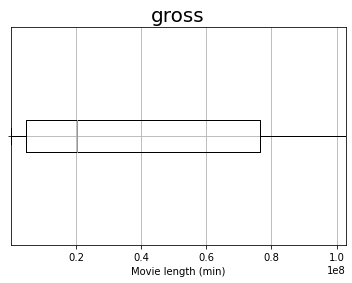

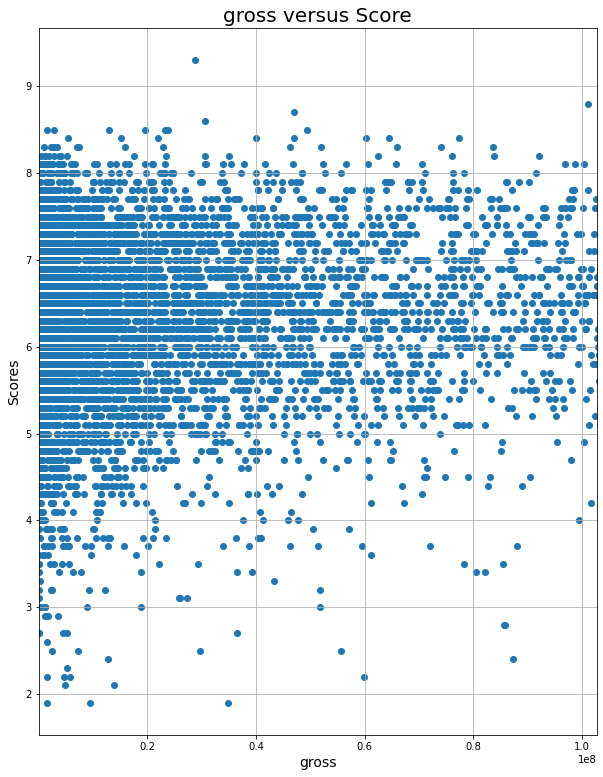

In [11]:
num_desc(movies_df, 'gross', 0, .8) 

### cat_count Example
#cat_count(df, column)

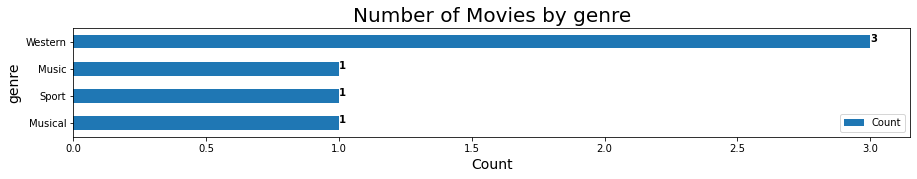

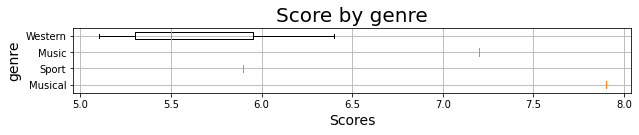

count   18.00
mean     6.47
std      0.55
min      5.67
25%      6.09
50%      6.44
75%      6.69
max      7.90
Name: score, dtype: float64


In [33]:
cat_count('genre', 0, 3)

### cat_median Example
#cat_median(df, column)

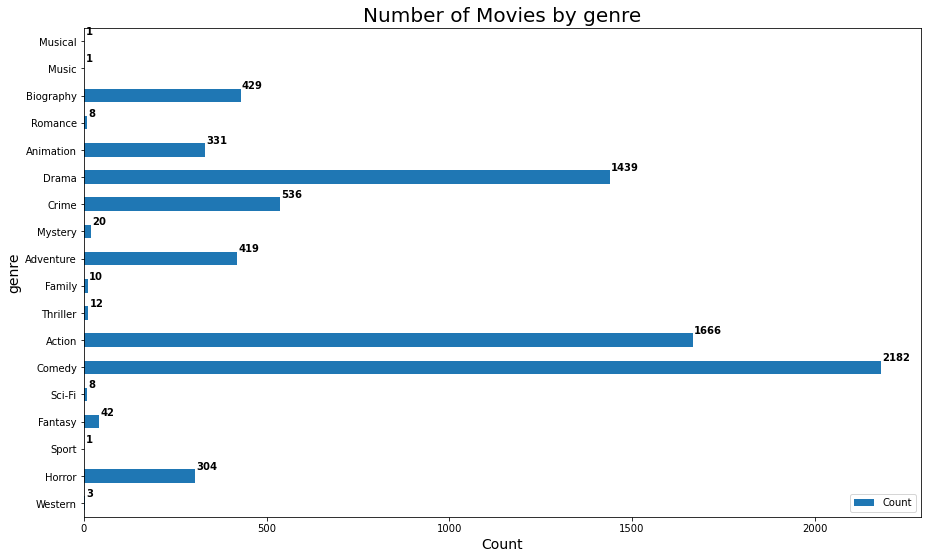

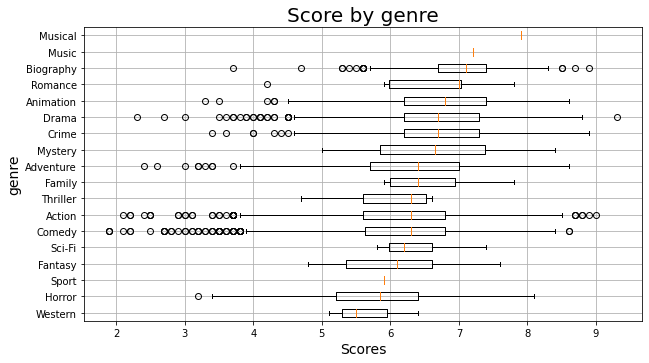

count   18.00
mean     6.47
std      0.55
min      5.67
25%      6.09
50%      6.44
75%      6.69
max      7.90
Name: score, dtype: float64


In [13]:
cat_median('genre', 0, 1)